# Exposure time calculator tests

In [4]:
import pandas as pd
from astropy.table import Table,QTable
import astropy.units as u
def p2f(x):
    return float(x.strip('%'))/100
c = pd.read_csv('~/Downloads/CGs.csv',converters={'BW':p2f},skip_blank_lines=True)
cgs = QTable.from_pandas(c)
cgs.add_index('CG')
cgs.show_in_notebook()


idx,CG,Name,BW,Cor for Pol,Polarizer loss,Sampling,t refl
0,HLC,HLC_CG,0.1,1,1.0,0.3,0.566
1,SPC_170714_REQF,SPC_170714_REQF,0.18,0,1.0,0.2,0.379
2,SPC_170714_CBEF,SPC_170714_CBEF,0.18,0,1.0,0.2,0.379
3,SPC 20140901_0.4,SPC_20140901_0.4,0.18,0,0.48,0.2,0.379
4,IP_160627_660,IP_request_160625_660,0.18,0,1.0,0.2,0.379
5,IP_160627_770,IP_request_160625_770,0.18,0,1.0,0.2,0.379
6,B2.2Fit565,B22_FIT_565,0.1,1,1.0,0.3,0.566
7,G2.2Req565,G22_REQ_565,0.1,1,1.0,0.3,0.566
8,SPC_20170501,SPC_20170501,0.18,0,1.0,0.2,0.379
9,SPC_20152016,SPC_20152016,0.18,0,1.0,0.2,0.379


In [167]:
coron = pd.read_csv('~/Downloads/'+cgs.loc['HLC']['Name']+'.csv',skip_blank_lines=True)
coron = coron.dropna()
corono = QTable.from_pandas(coron)
corono['r(arcsec)'].unit = u.arcsec
corono['area(sq_arcsec'].unit = u.arcsec**2
corono.show_in_notebook()

idx,r(lam/D),r(arcsec),I,contrast,core_thput,PSF_peak,area(sq_arcsec,occ_trans
,,arcsec,,,,,arcsec2,
0,2.7,0.128699,7.21e-12,9.25e-09,0.00575,0.00078,0.00203,0.0042
1,3.0,0.142999,3.81e-12,2.78e-09,0.01018,0.00137,0.00205,0.2649
2,3.3,0.157299,1.85e-12,8.86e-10,0.01557,0.00209,0.00206,0.23484
3,3.6,0.171598,1.59e-12,6.39e-10,0.01842,0.00249,0.00206,0.23055
4,3.9,0.185898,2.19e-12,8.28e-10,0.01961,0.00264,0.00206,0.23373
5,4.2,0.200198,2.46e-12,8.85e-10,0.02071,0.00278,0.00206,0.2347
6,4.5,0.214498,2.15e-12,7.37e-10,0.02172,0.00291,0.00208,0.23323
7,4.8,0.228798,1.7e-12,5.63e-10,0.02243,0.00303,0.00206,0.23128
8,5.1,0.243098,1.62e-12,5.24e-10,0.02281,0.00308,0.00205,0.23104


In [139]:
scens = pd.read_csv('~/Downloads/Scenarios.csv',skip_blank_lines=True)
scenarios = QTable.from_pandas(scens)
scenarios.add_index('Scenario')
scenarios.add_index('Coronagraph')
scenarios['Center lam'].unit = u.nm
scenarios['t integ, hrs'].unit = u.h
scenarios['Years at L2'].unit = u.year
scenarios['Ref  Dmag'].unit = u.mag
scenarios.show_in_notebook()

idx,Scenario,Center lam,BW,R,Coronagraph,Years at L2,f_pp,FP type,"t integ, hrs",SNR,Ref Dmag
,,nm,,,,yr,,,h,,mag
0,SPC IFS1 REQ,660.0,0.18,50,SPC_170714_REQF,1.0,0.1,IFS,240.0,10,3.0
1,SPC IFS1 CBE,660.0,0.18,50,SPC_170714_CBEF,1.0,0.1,IFS,240.0,10,3.0
2,SPC IFS 2 REQ,770.0,0.18,50,SPC_170714_REQF,1.0,0.1,IFS,240.0,10,3.0
3,SPC IFS2 CBE,770.0,0.18,50,SPC 20140901_0.4,1.0,0.1,IFS,250.0,10,3.0
4,HLC IMG 1,508.0,0.1,0,HLC161228.4,3.0,0.1,Imaging,300.0,5,3.0
5,HLC IMG 2,575.0,0.1,0,HLC161228.4,3.0,0.1,Imaging,24.0,5,3.0
6,SuperEarth,565.0,0.1,0,HLC161025.4,3.0,0.1,Imaging,100.0,5,3.0
7,NBF Spectroscopy,660.0,0.02,0,G2.2Fit565,3.0,0.1,Imaging,200.0,10,3.0
8,L3 23 Disk DI,565.0,0.1,0,HLC161228.4,3.0,0.2,Imaging,24.0,5,3.0


In [158]:
scenarios.loc['SPC IFS2 CBE']['Coronagraph']
cgs.loc[scenarios.loc['SPC IFS2 CBE']['Coronagraph']]['Name']

'SPC_20140901_0.4'

jupiterRad


In [124]:
pl = pd.read_csv('~/Downloads/Planets.csv',skip_blank_lines=True)
planets = QTable.from_pandas(pl)
planets['V'].unit=u.mag
planets['A'].unit=u.au
planets['DIST'].unit=u.pc
planets['Rp / R_J'].unit=u.R_jup
planets.add_index(['NAME'])
planets.show_in_notebook(display_length=10)

idx,No.,NAME,V,DIST,Spec,A,V Comp.,Comp. Bright. Frac,Use Spec,Interim Albedos,Rp / R_J,HD
,,,mag,pc,,AU,,,,,jupiterRad,
0,1,beta Gem b,1.15,10.4,K0IIIb,1.76,99.0,0.0,k0v,0.25,1.18,62509
1,2,gamma Cep b,3.21,14.1,K1IV,1.98,99.0,0.0,k0v,0.25,1.22,222404
2,3,HD 147513 b,5.37,12.8,G5V,1.31,99.0,0.0,g5v,0.25,1.91,147513
3,4,HD 192310 c,5.73,8.9,K2+V,1.18,99.0,0.0,k0v,0.25,0.49,192310
4,5,upsilon And d,4.1,13.5,F9V,2.52,99.0,0.0,f5v,0.25,1.15,9826
5,6,epsilon Eri b,3.72,3.2,K2Vk:,3.376,99.0,0.0,k0v,0.25,1.54,22049
6,7,47 UMa b,5.03,14.1,G1V,2.1,99.0,0.0,g0v,0.25,1.19,95128
7,8,HD 10647 b,5.52,17.4,F9V,2.02,99.0,0.0,f5v,0.25,1.24,10647
8,9,47 UMa c,5.03,14.1,G1V,3.57,99.0,0.0,g0v,0.25,1.27,95128


<Quantity [  2.63292252e+13,  2.96203784e+13,  1.95973211e+13,
             1.76525487e+13,  3.76986634e+13,  5.05042411e+13,
             3.14155528e+13,  3.02187699e+13,  5.34064398e+13,
             5.01152867e+13,  7.94364693e+13,  2.61796274e+13,
             5.93903547e+13,  7.98852630e+13,  4.38321761e+13,
             4.89185037e+13,  8.18300353e+13,  4.75721229e+13,
             7.97356651e+13,  6.29807036e+13,  5.59496036e+13,
             8.72155586e+13,  5.35560377e+13,  7.68933055e+13,
             4.51785570e+13,  7.36021524e+13,  7.70429034e+13,
             7.22557715e+13,  5.32568420e+13,  3.50059017e+13,
             1.01726552e+14,  9.12547011e+13,  6.62718567e+13,
             5.38552335e+13,  4.48793612e+13,  4.26353931e+13,
             0.00000000e+00,  1.49597871e+13,  2.24396806e+13,
             2.24396806e+13,  4.48793612e+13,  4.48793612e+13,
             4.48793612e+13,  4.48793612e+13,  4.48793612e+13,
             4.48793612e+13,  4.48793612e+13,  4.487936

In [5]:
st = pd.read_csv('~/Downloads/Spectra.csv',
                      skip_blank_lines=True,
                     )
stars = QTable.from_pandas(st)
stars['Wavelength (m) '].unit = u.m
stars.rename_column('Wavelength (m) ', 'Wavelength')
stars['E_ph (J)'].unit = u.J
stars.rename_column('E_ph (J)', 'E_ph')
cols = ['a0v','a5v','f5v','g0v','g5v','k0v','k5v','m0v','m5v']
for col in cols:
    stars[col].unit = u.W/u.m**2/u.m
stars.show_in_notebook(display_length=10)



idx,Wavelength,E_ph,a0v,a5v,f5v,g0v,g5v,k0v,k5v,m0v,m5v
,m,J,W / m3,W / m3,W / m3,W / m3,W / m3,W / m3,W / m3,W / m3,W / m3
0,2.5e-07,7.946e-19,0.04014,0.02096,0.006508,0.005434,0.001862,0.0001362,7.353e-05,8.703e-05,0.0001378
1,2.51e-07,7.914e-19,0.04007,0.02021,0.006222,0.004911,0.001695,0.0001431,6.76e-05,0.0001079,0.0001708
2,2.52e-07,7.883e-19,0.03814,0.01947,0.005937,0.004389,0.00133,0.0001168,4.115e-05,8.443e-05,0.0001337
3,2.53e-07,7.852e-19,0.03462,0.01773,0.005251,0.003996,0.001373,0.0001607,8.089e-05,0.0001063,0.0001683
4,2.54e-07,7.821e-19,0.03368,0.016,0.004565,0.003604,0.001686,0.000227,7.853e-05,0.0001557,0.0002465
5,2.55e-07,7.79e-19,0.03336,0.01761,0.00492,0.004572,0.001901,0.0002491,8.624e-05,0.0001615,0.0002558
6,2.56e-07,7.76e-19,0.03848,0.01923,0.005274,0.005538,0.002669,0.000231,0.0001077,0.0001495,0.0002367
7,2.57e-07,7.729e-19,0.03977,0.02057,0.006506,0.006559,0.003809,0.0002574,9.569e-05,0.0001802,0.0002853
8,2.58e-07,7.699e-19,0.03908,0.02192,0.007738,0.00758,0.00437,0.0002145,1.169e-05,9.786e-05,0.0001549


In [31]:
from scipy.interpolate import interp1d
from scipy.integrate import quad
import numpy as np
wavels = stars['Wavelength'].to(u.nm)
spectrum = stars['g5v']
flux = interp1d(wavels,spectrum)
# flux = lambda x: _flux(x.to(u.m))*stars['g5v'].unit
print flux(251.5)
print quad(flux,500,600)

0.0015125
(3.6415054077070734, 0.0003176803461166777)


/Users/mrizzo/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


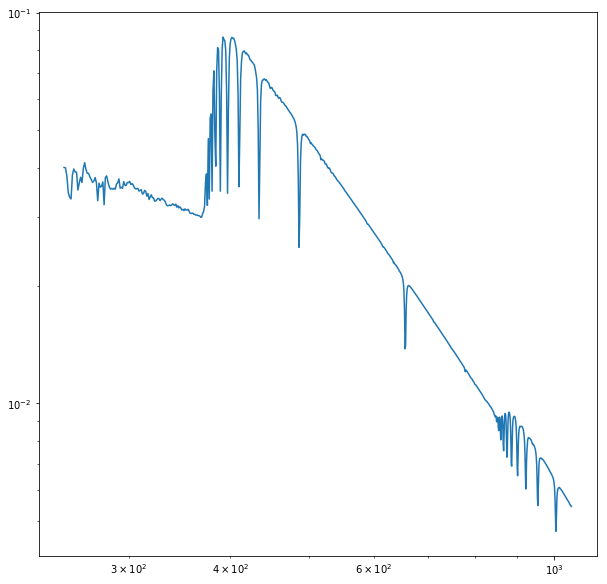

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.loglog(stars['Wavelength'].to(u.nm),stars['a0v'])
plt.show()

In [195]:
vals = {'Name': 'Radius',
        'Value': 2.09e-1*u.arcsec,
        'Comment': 'Radius at IWA',
        'Formula': '',
        'Symbol': '$r_\mathrm{IWA}$'}
vals2 = {'Name': 'Design wavelength',
        'Value': 800*u.nm,
        'Comment': '',
        'Formula': '',
        'Symbol': '$\lambda_\mathrm{d}$'}
tab = QTable.from_pandas(pd.DataFrame([vals,vals2]))
tab.add_index('Name')
tab.show_in_notebook(display_length=10)

idx,Comment,Formula,Name,Symbol,Value
0,Radius at IWA,,Radius,$r_\mathrm{IWA}$,0.209 arcsec
1,,,Design wavelength,$\lambda_\mathrm{d}$,800.0 nm


In [205]:
import numpy as np

In [287]:
class Telescope(object):
    def __init__(self,  D = 2.37*u.m,
                    obs = 0.32,
                    strut_obs = 0.07):
        self.diam = D
        self.cobscuration = obs
        self.sobscuration = strut_obs
    
    @property
    def clearApFrac(self):
        return (1.-self.sobscuration)*(1.-self.cobscuration**2)

    @property
    def Aeff(self):
        return 0.25*np.pi*self.diam**2*self.clearApFrac
                
    @property
    def table(self):
        _diam = {'Name': 'Diameter',
                    'Value': self.diam,
                    'Comment': 'Primary mirror diameter',
                    'Formula': '',
                    'Symbol': r'$$D_\mathrm{PM}$$'}
        _cobscuration = {'Name': 'Central obscuration',
                            'Value': self.cobscuration,
                            'Comment': 'pct of primary mirror diameter',
                            'Formula': '',
                            'Symbol': r'$$\mathrm{oc}$$'}
        _sobscuration = {'Name': 'Strut obscuration',
                            'Value': self.sobscuration,
                            'Comment': 'pct of primary mirror area',
                            'Formula': '',
                            'Symbol': r'$$\mathrm{os}$$'}
        _clearApFrac = {'Name': 'Clear aperture fraction',
                    'Value': self.clearApFrac,
                    'Comment': 'After obscuration by secondary mirror and struts',
                    'Formula': r'$$(1-%s)\times (1-%s^2)$$' % (_sobscuration['Symbol'].replace('$',''),
                                                           _cobscuration['Symbol'].replace('$','')),
                    'Symbol': r'$$\mathrm{obsc}$$'}
        _Aeff = {'Name': 'Effective aperture',
                    'Value': self.Aeff,
                    'Comment': 'After obscuration by secondary mirror and struts',
                    'Formula': r'$$%s \times%s$$' % (_diam['Symbol'].replace('$',''),
                                                _clearApFrac['Symbol'].replace('$','')),
                    'Symbol': r'$$A_\mathrm{eff}$$'}
        tab = QTable.from_pandas(pd.DataFrame([_diam,
                                               _cobscuration,
                                               _sobscuration,
                                               _clearApFrac,
                                               _Aeff]))
        tab.add_index('Name')
        return tab['Name','Value','Symbol','Formula','Comment']


In [288]:
from IPython.display import display, Math, Latex
tel = Telescope()
tel.table.show_in_notebook(display_length=10)

idx,Name,Value,Symbol,Formula,Comment
0,Diameter,2.37 m,$$D_\mathrm{PM}$$,,Primary mirror diameter
1,Central obscuration,0.32,$$\mathrm{oc}$$,,pct of primary mirror diameter
2,Strut obscuration,0.07,$$\mathrm{os}$$,,pct of primary mirror area
3,Clear aperture fraction,0.834768,$$\mathrm{obsc}$$,$$(1-\mathrm{os})\times (1-\mathrm{oc}^2)$$,After obscuration by secondary mirror and struts
4,Effective aperture,3.68258148955 m2,$$A_\mathrm{eff}$$,$$D_\mathrm{PM} \times\mathrm{obsc}$$,After obscuration by secondary mirror and struts


In [284]:
D = 2.37*u.m
rasec = (0.18*u.arcsec).to(u.rad)
rlamD = 2.6
print (D*rasec/rlamD).to(u.m, equivalencies=u.dimensionless_angles())

7.9546737062e-07 m


In [1]:
import sys,os
codefolder = '../../../../crispy'
if codefolder not in sys.path: sys.path.append(codefolder)
import crispy.ETC as ETC

../../../../crispy/crispy/ETC.py


In [2]:
ETC.PlanetParameters('SuperEarth','beta Gem b')

565.0 nm


In [6]:
print(ETC.db.Planets)

None


Scenario,Center lam,BW,R,Coronagraph,Years at L2,f_pp,FP type,"t integ, hrs",SNR,Ref Dmag
,nm,,,,yr,,,h,,mag
str16,float64,float64,int64,str16,float64,float64,str7,float64,int64,float64
SPC IFS1 REQ,660.0,0.18,50,SPC_170714_REQF,1.0,0.1,IFS,240.0,10,3.0
SPC IFS1 CBE,660.0,0.18,50,SPC_170714_CBEF,1.0,0.1,IFS,240.0,10,3.0
SPC IFS 2 REQ,770.0,0.18,50,SPC_170714_REQF,1.0,0.1,IFS,240.0,10,3.0
SPC IFS2 CBE,770.0,0.18,50,SPC 20140901_0.4,1.0,0.1,IFS,250.0,10,3.0
HLC IMG 1,508.0,0.1,0,HLC161228.4,3.0,0.1,Imaging,300.0,5,3.0
HLC IMG 2,575.0,0.1,0,HLC161228.4,3.0,0.1,Imaging,24.0,5,3.0
SuperEarth,565.0,0.1,0,HLC161025.4,3.0,0.1,Imaging,100.0,5,3.0
NBF Spectroscopy,660.0,0.02,0,G2.2Fit565,3.0,0.1,Imaging,200.0,10,3.0
